## Assignment

In this assignment, you keep working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats import zscore



warnings.filterwarnings('ignore')

In [6]:


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'



engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


edu_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [63]:
from scipy.stats import ttest_ind


race = edu_df["race/ethnicity"].unique()
grouped_df = edu_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(ttest_ind(
                edu_df[edu_df["race/ethnicity"]==race[i]][var], 
                edu_df[edu_df["race/ethnicity"]==race[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

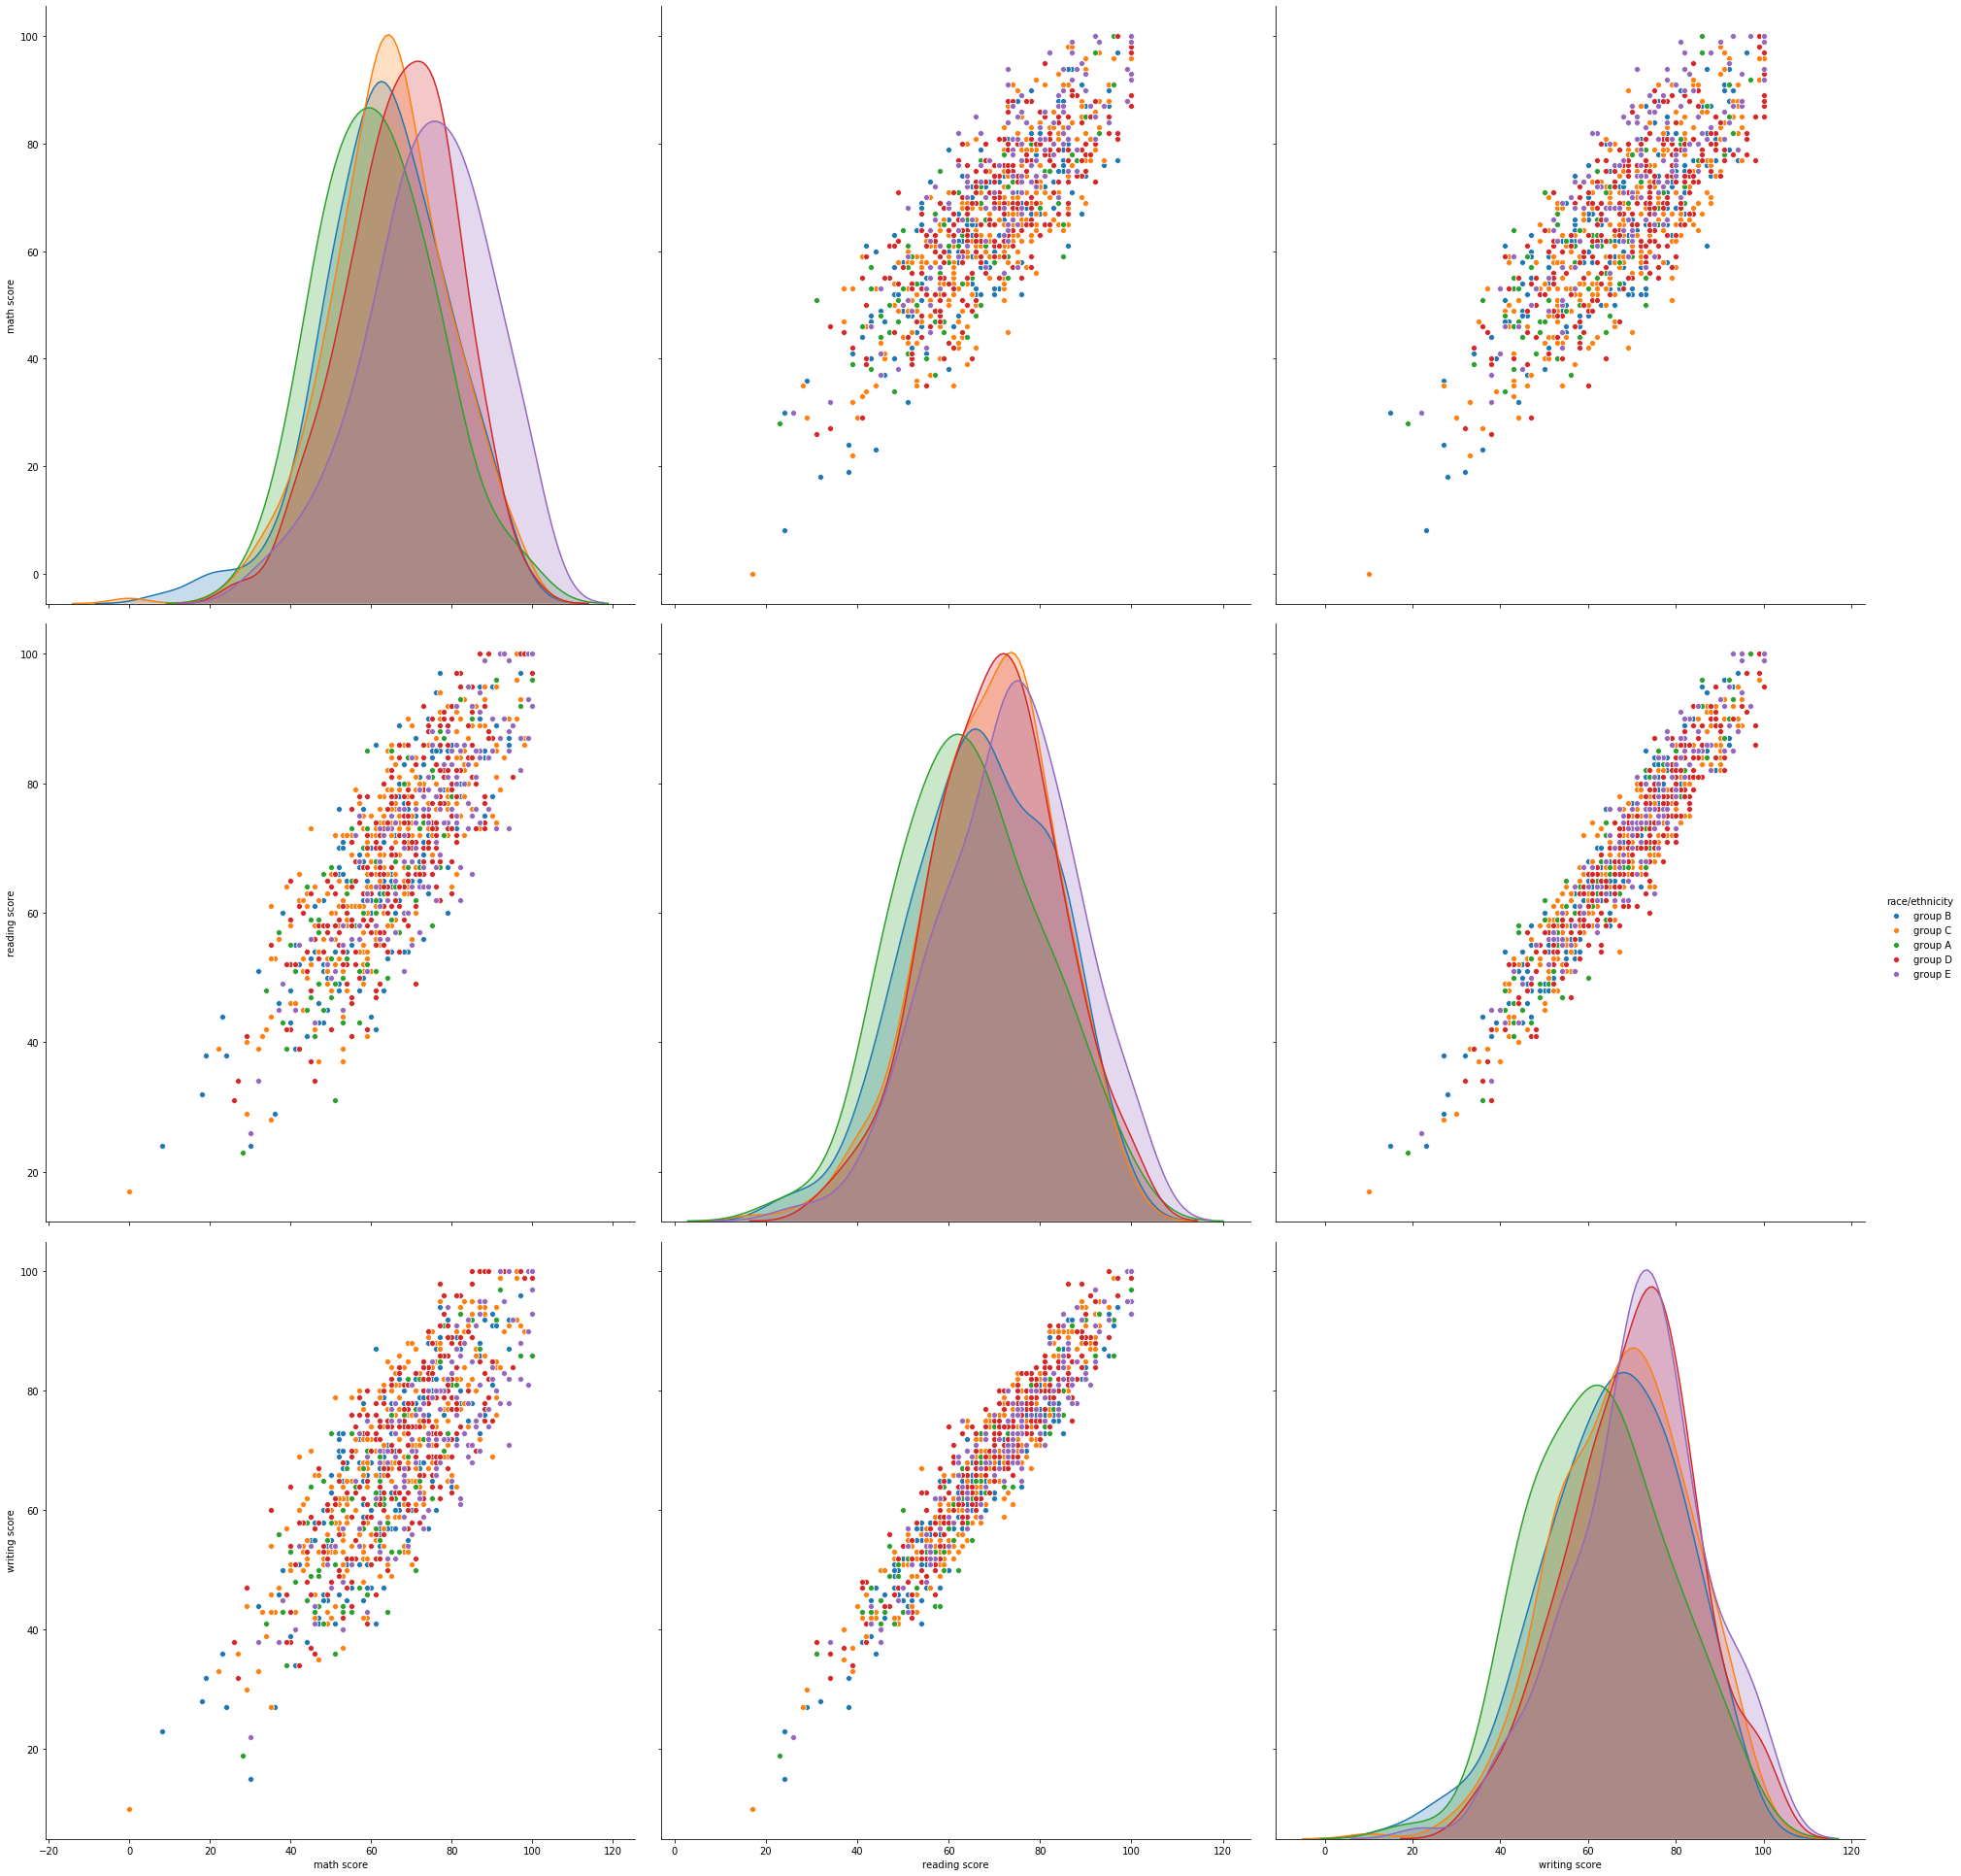

In [28]:
#plt.figure(figsize=(20,20))
sns.pairplot(edu_df,hue="race/ethnicity",height=9)


In [64]:
from scipy.stats import ttest_ind


race = edu_df["race/ethnicity"].unique()
grouped_df = edu_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(ttest_ind(
                edu_df[edu_df["race/ethnicity"]==race[i]][var], 
                edu_df[edu_df["race/ethnicity"]==race[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


group E seems to have better over all scores followed closely by D Then C B and A 


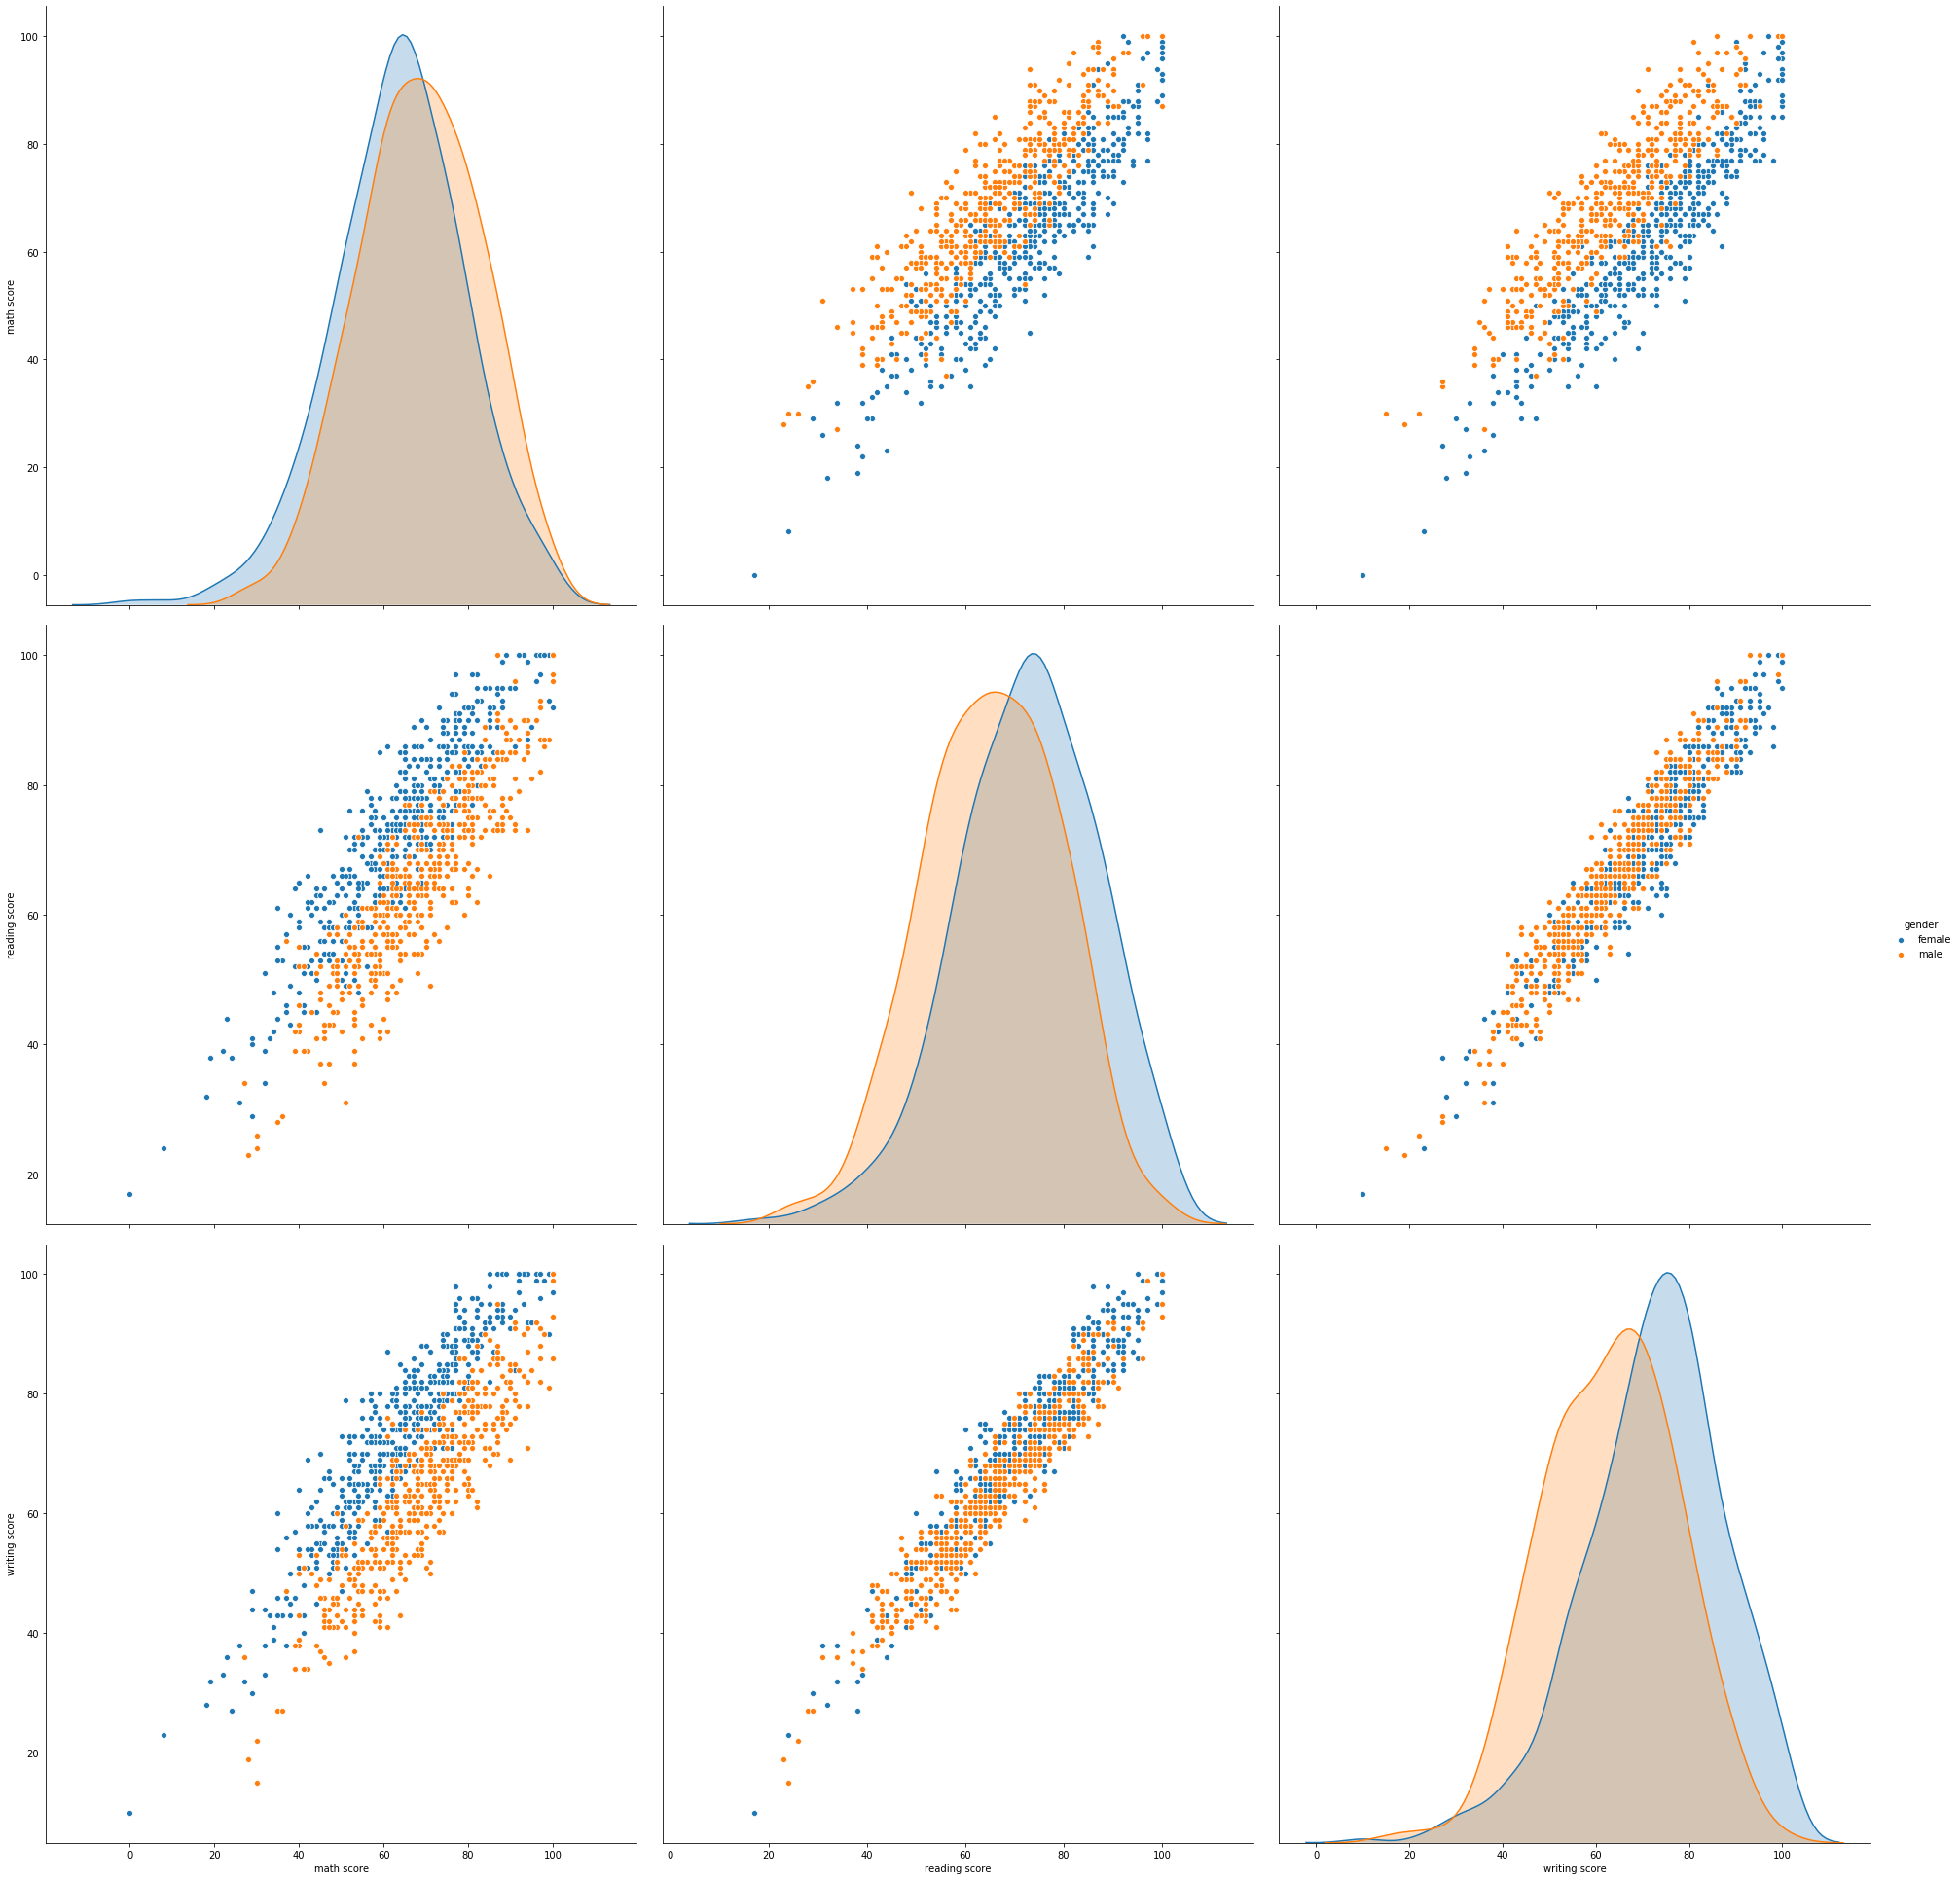

In [29]:
sns.pairplot(edu_df, hue='gender',height=9)


In [65]:
from scipy.stats import ttest_ind


gend = edu_df["gender"].unique()
grouped_df = edu_df.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gend)):
        for j in range(i+1, len(gend)):
            print("t-test between groups {0} and {1}:".format(gend[i], gend[j]))
            print(ttest_ind(
                edu_df[edu_df["gender"]==gend[i]][var], 
                edu_df[edu_df["gender"]==gend[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)



in regards to Gender in the charts  Women seem to have better reading and writing scores where as men seem to have better math scores
however the Ttest suggests that there is no statistical difference between these groups. 

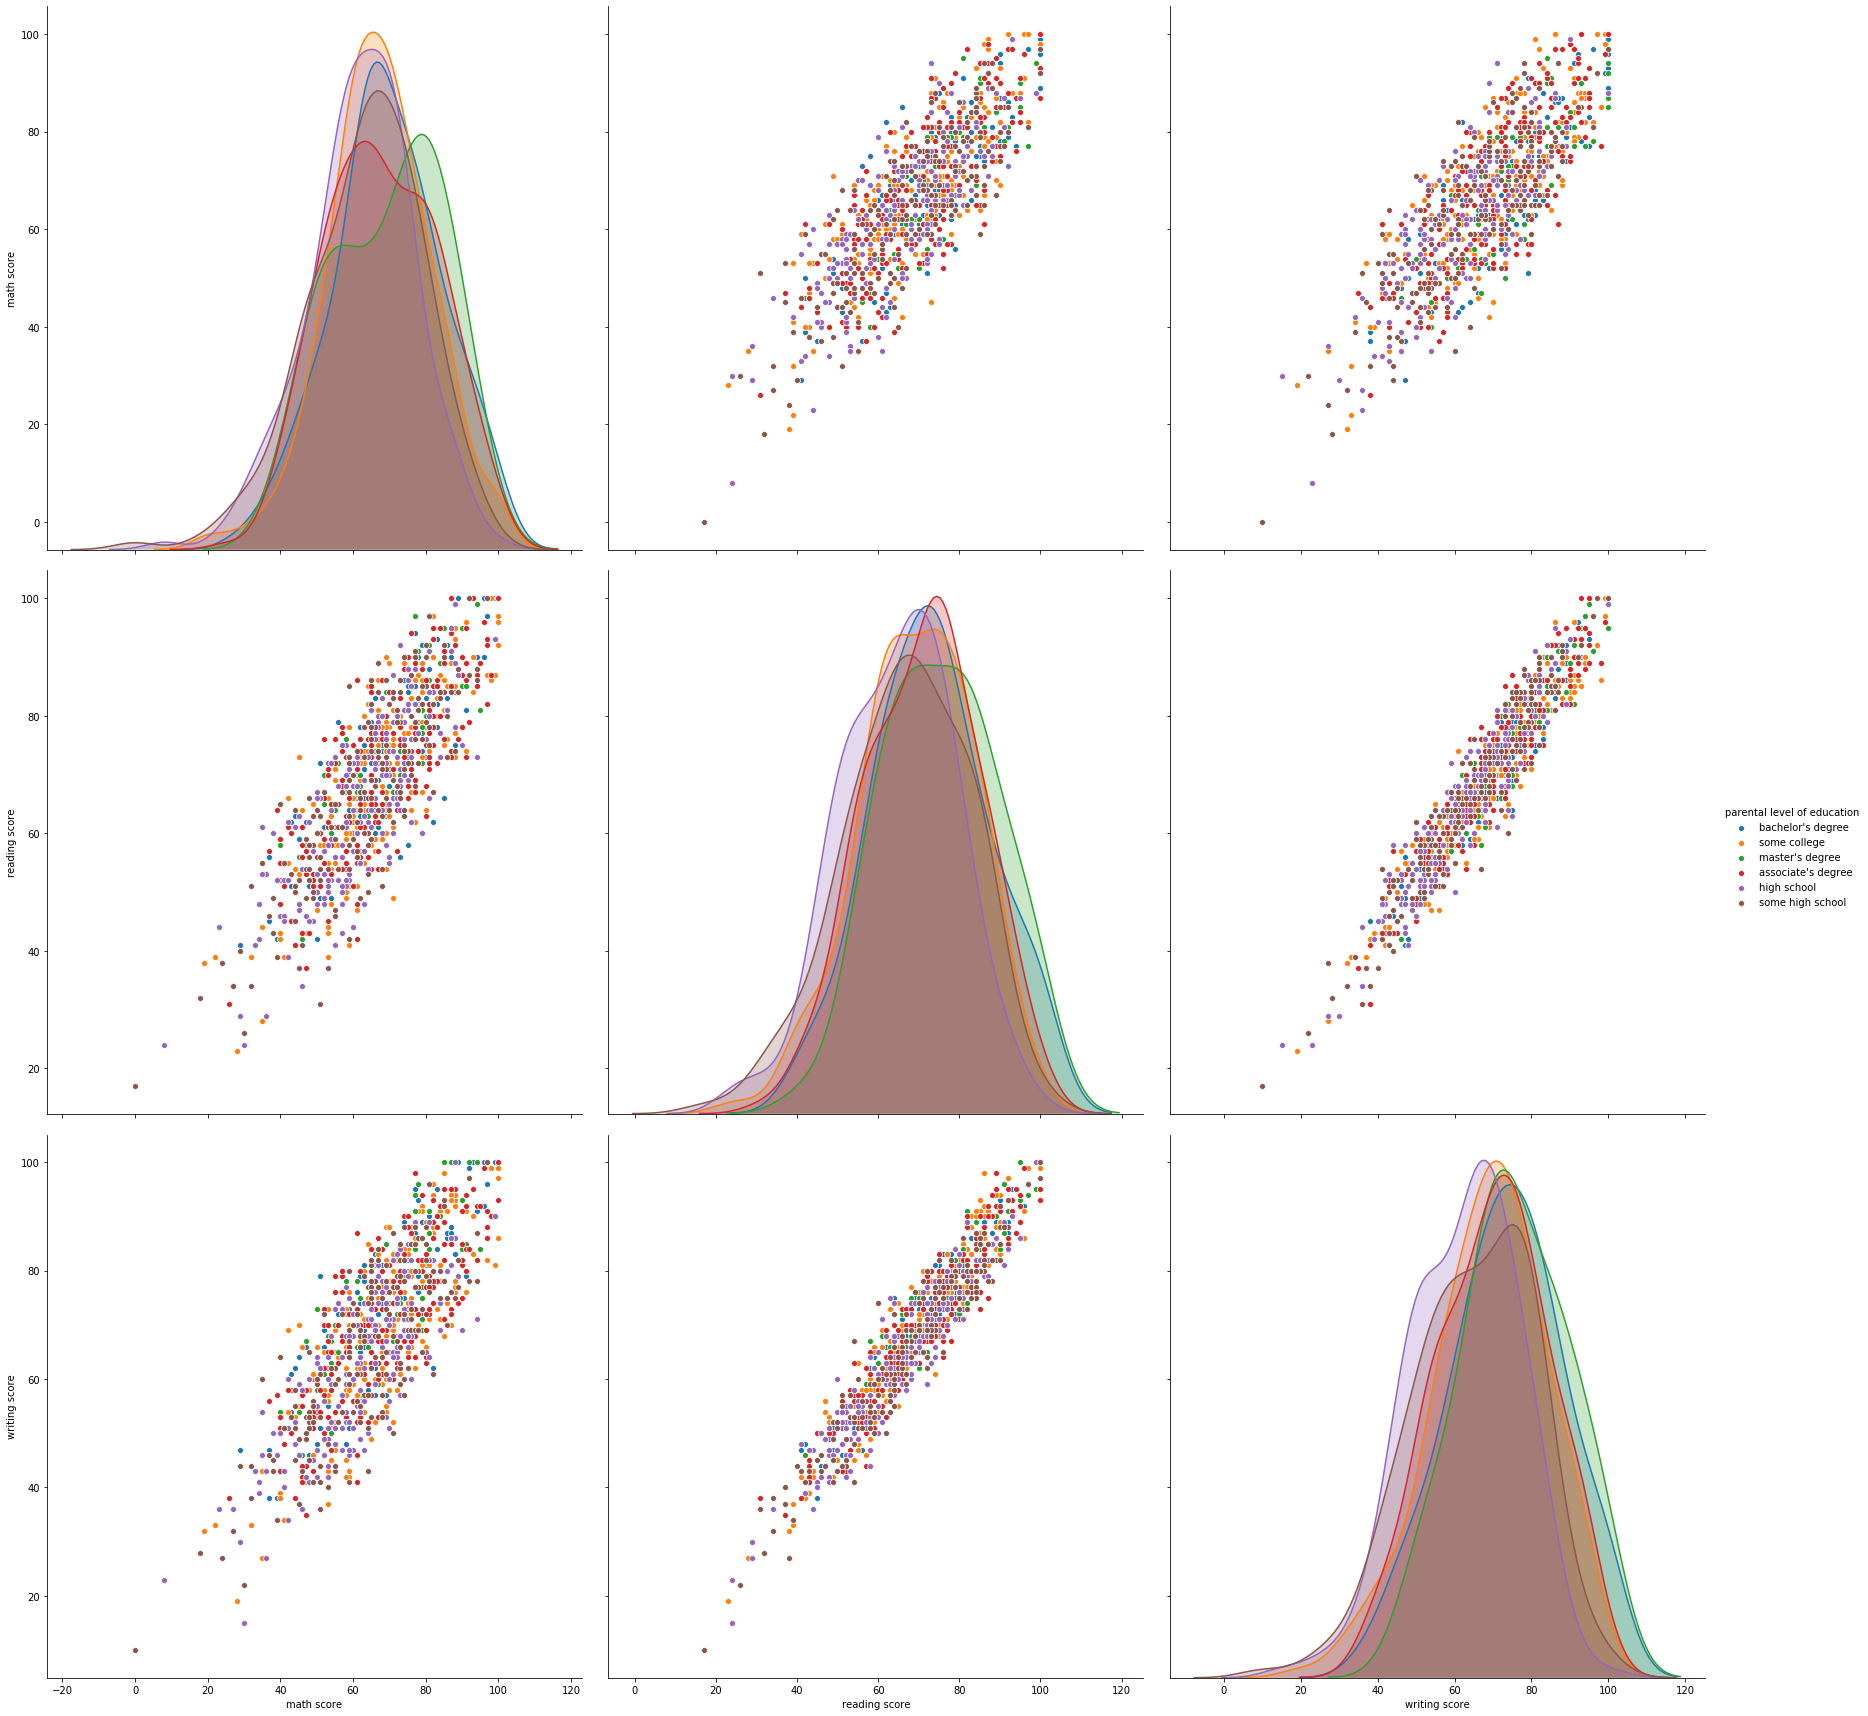

In [33]:
sns.pairplot(edu_df, hue='parental level of education',height=8)


In [66]:
from scipy.stats import ttest_ind


parentedu = edu_df["parental level of education"].unique()
grouped_df = edu_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parentedu)):
        for j in range(i+1, len(parentedu)):
            print("t-test between groups {0} and {1}:".format(parentedu[i], parentedu[j]))
            print(ttest_ind(
                edu_df[edu_df["parental level of education"]==parentedu[i]][var], 
                edu_df[edu_df["parental level of education"]==parentedu[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

it appears that a higer level of parental education attainment suggests success in almost all feilds with masters and bachlors degrees making the most difference. however it seems that some highschool is better than all of high school in some situations 

## 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [37]:
edu_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

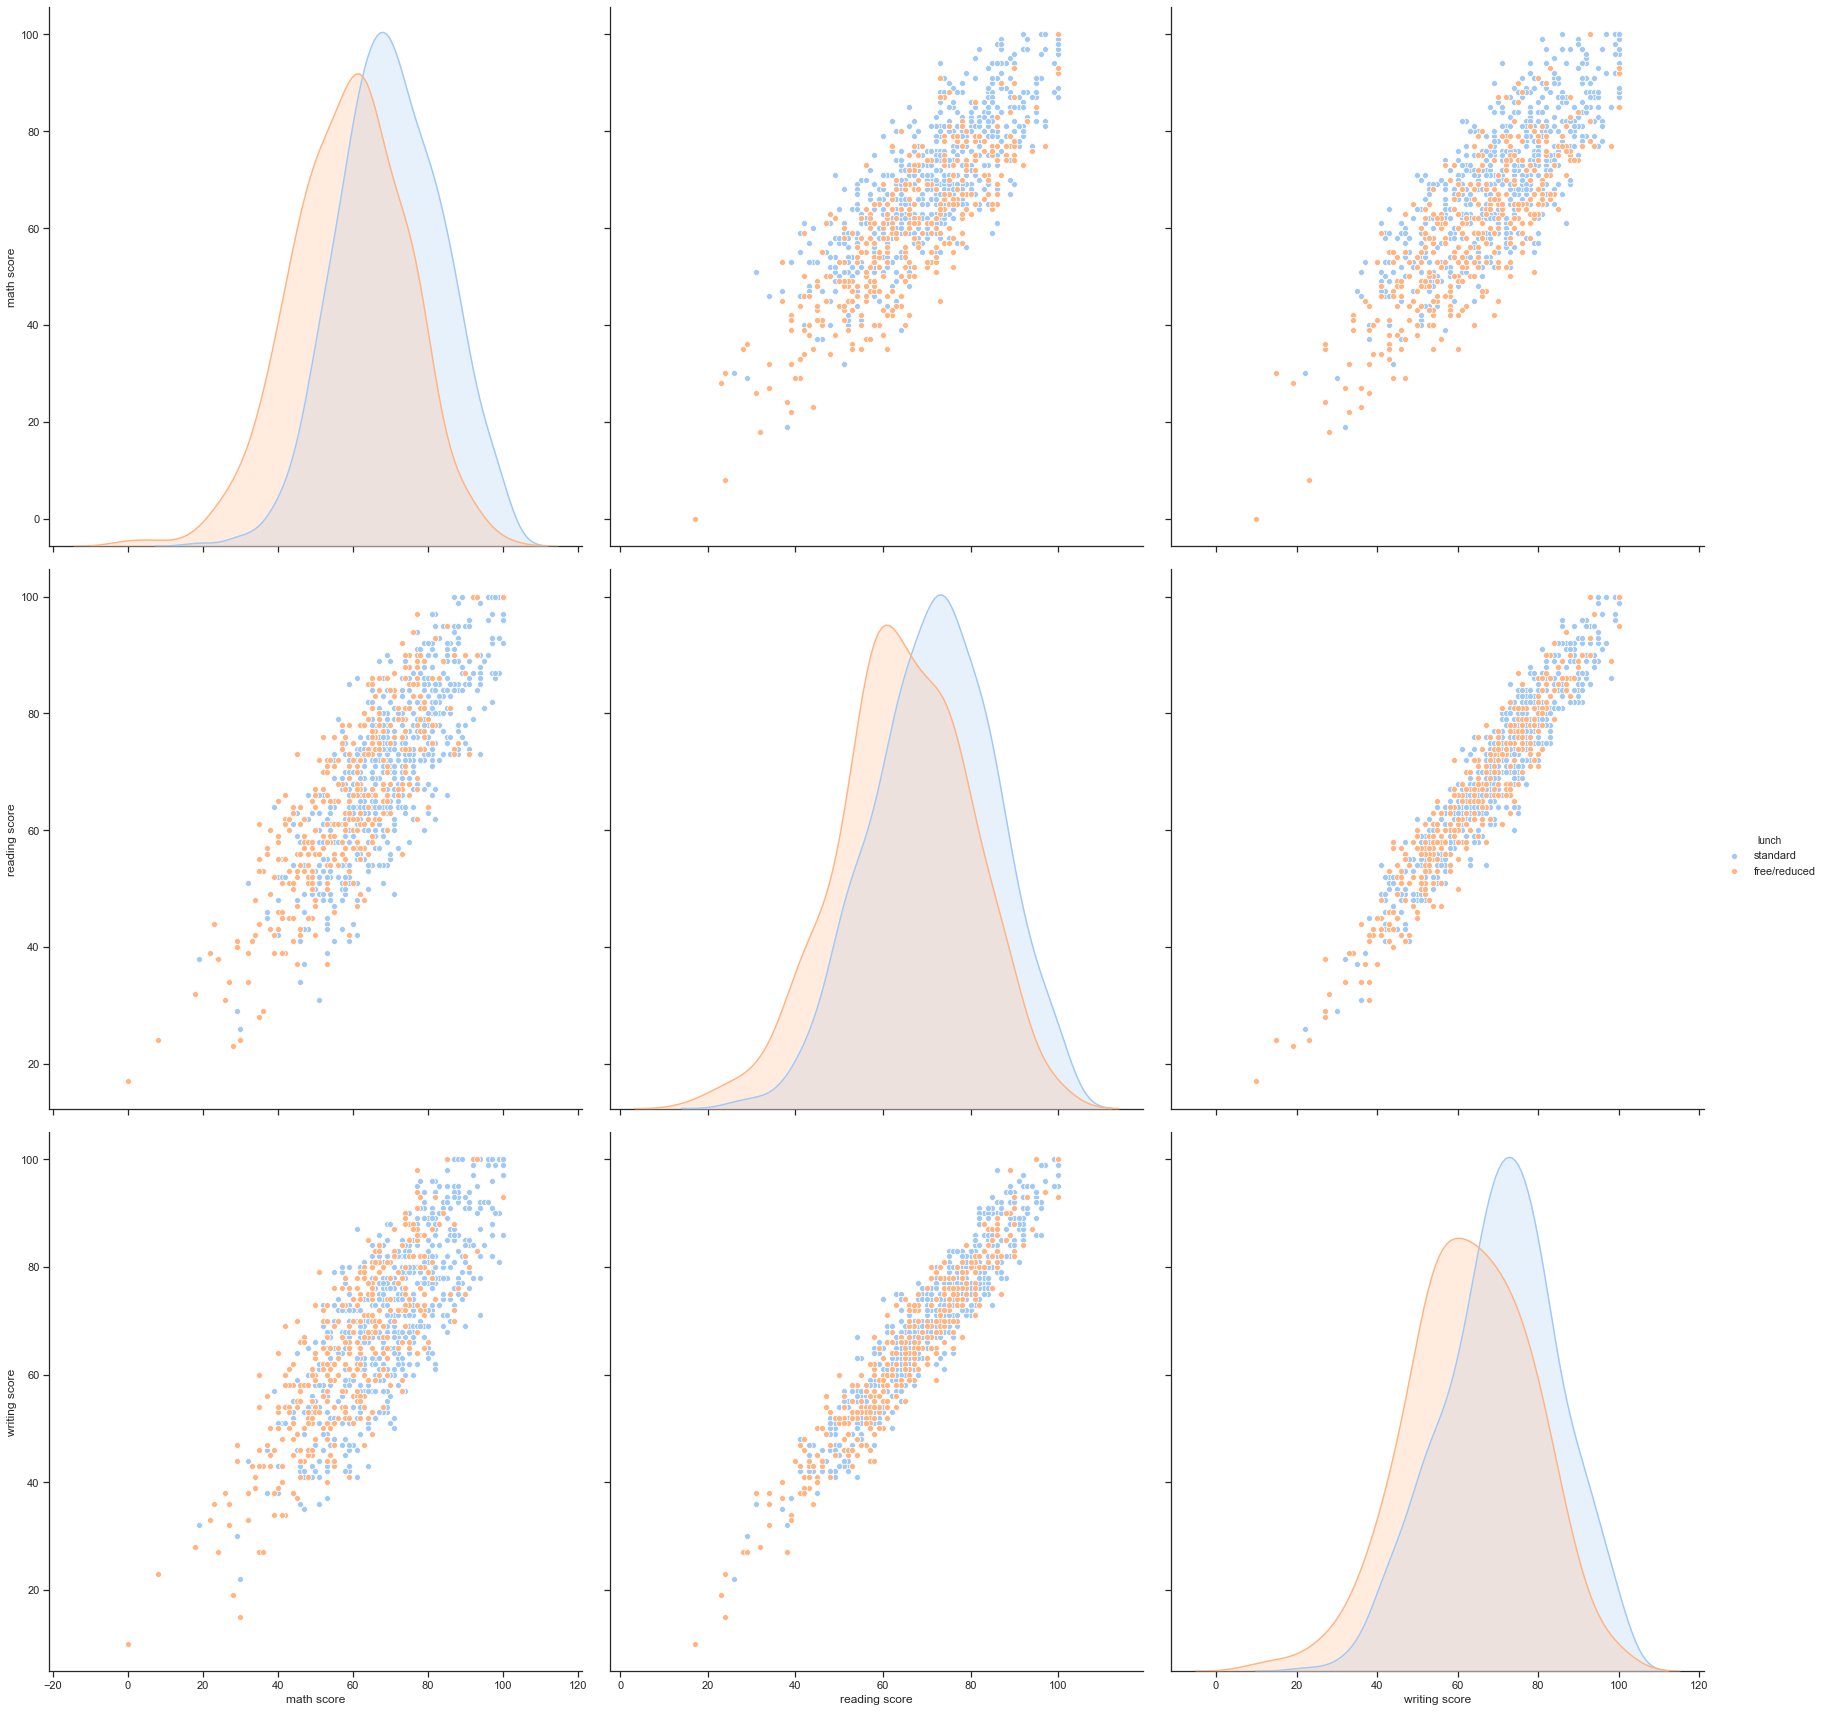

In [50]:
sns.pairplot(edu_df, hue='lunch',height=8)


it appears that the free lunch students seem to fair poorer on test scores overall 

## 3. Does the test preparation course seem to have an effect on the exam performances?


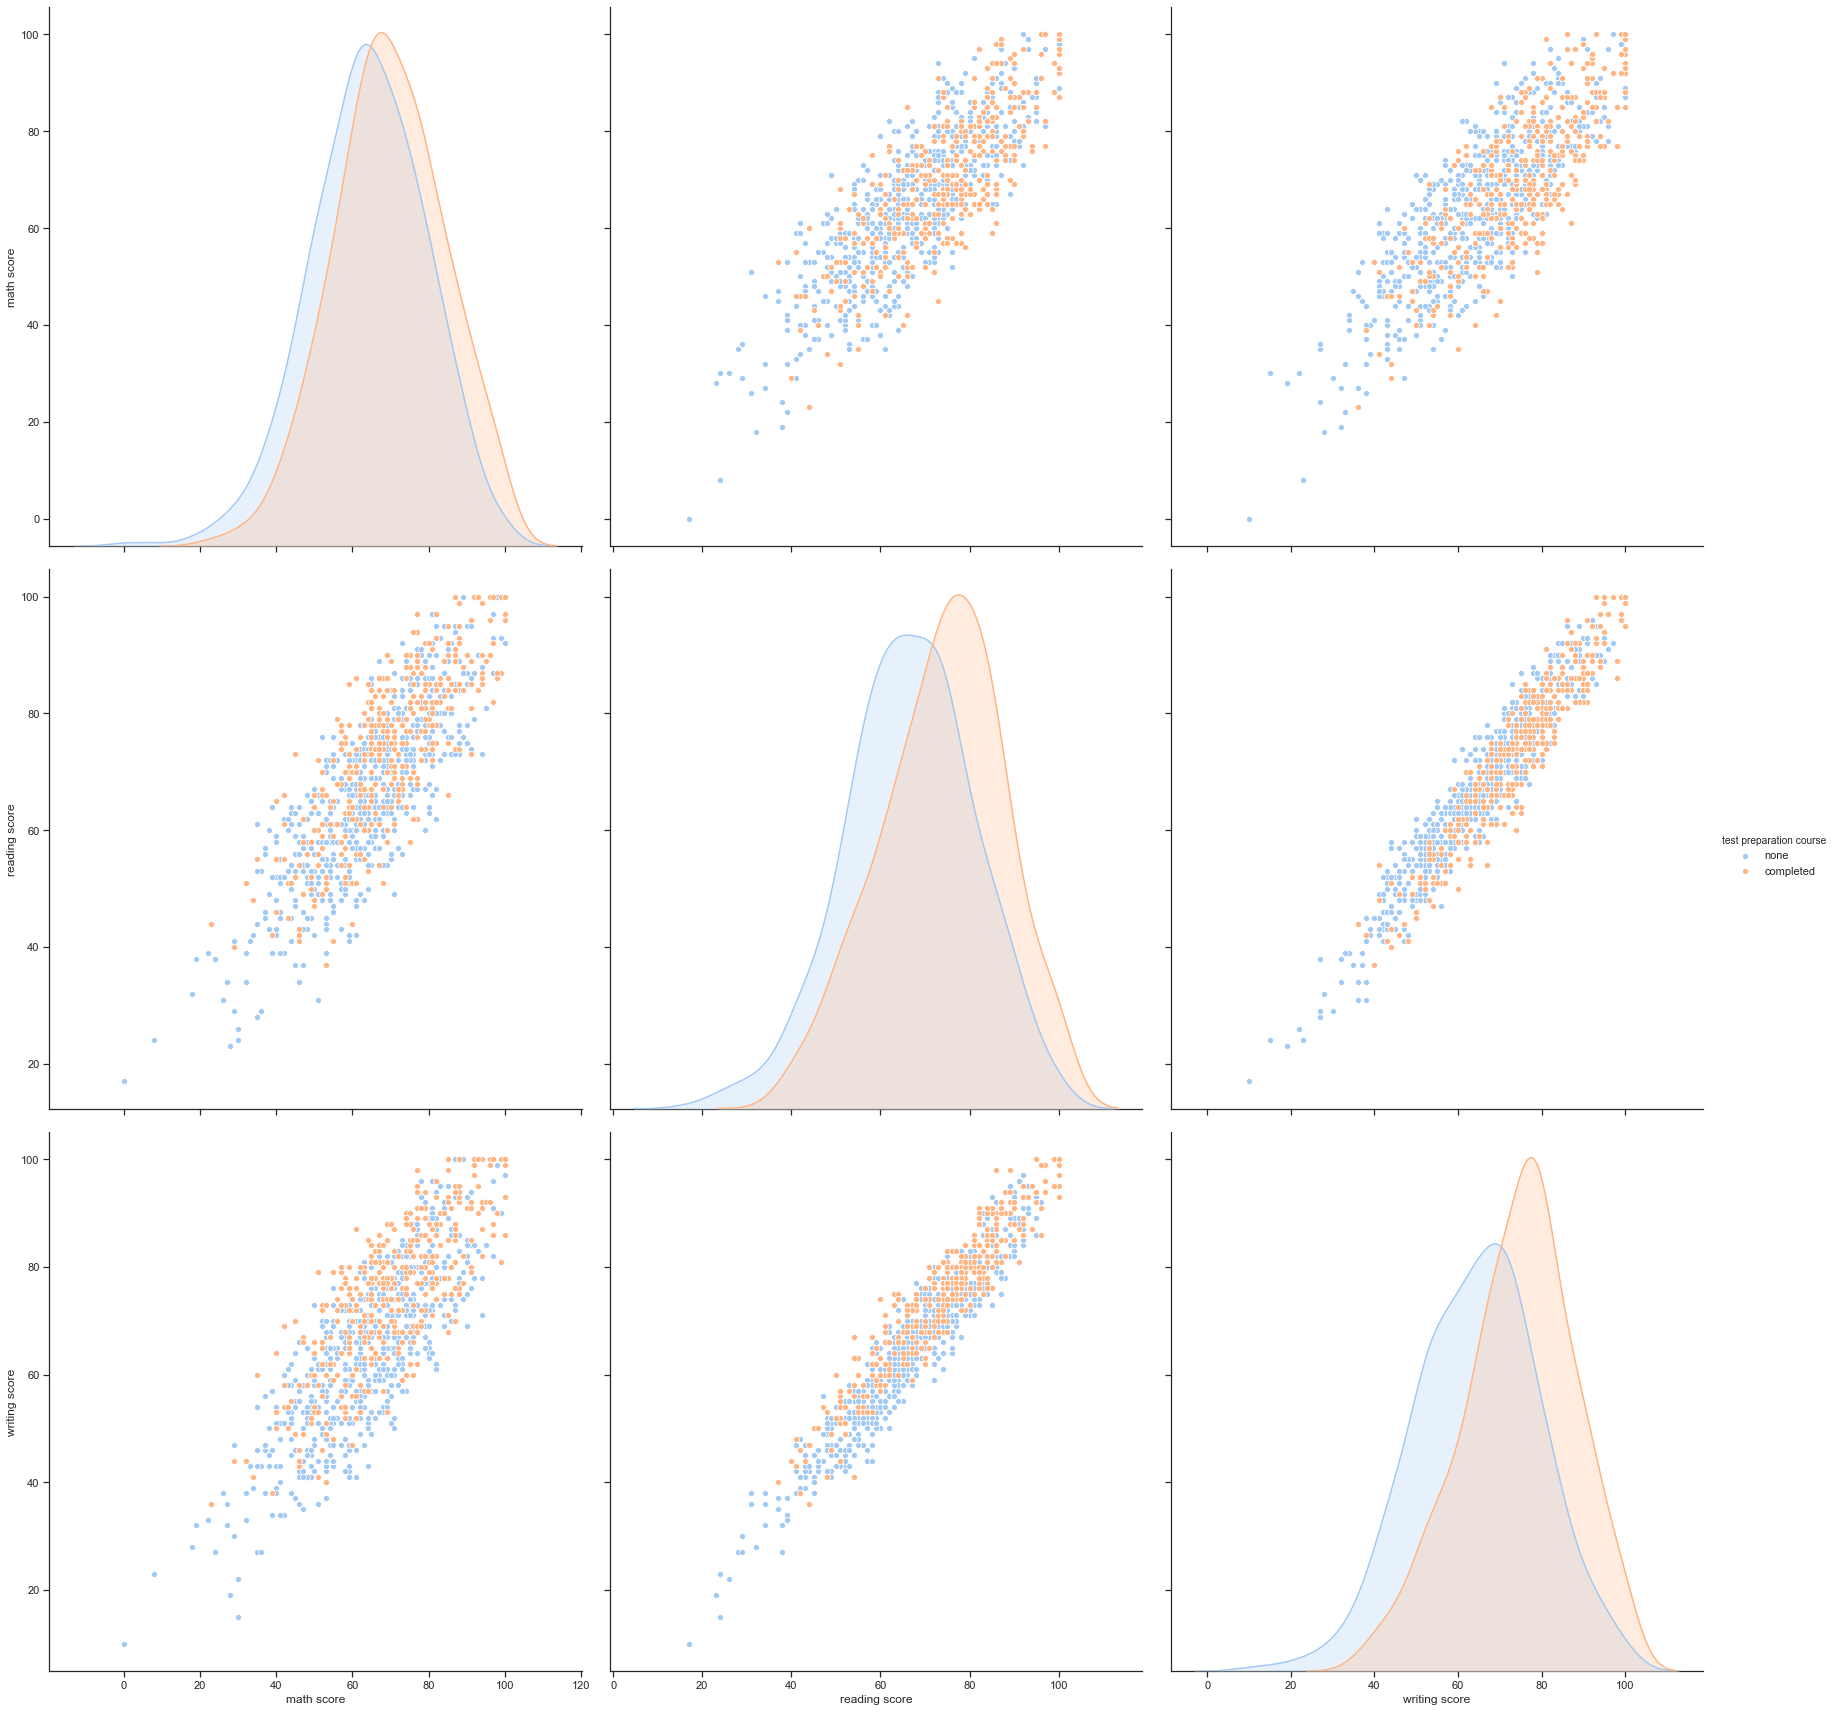

In [52]:
sns.pairplot(edu_df, hue='test preparation course',height=8)


In [56]:
edu_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


it appears that test preperation has a positive effect on scores especially in reading a writting 

## 4. Which 2 exam scores are most correlated with each other?


from a visual analysis it appears the the reading a writting are the most tightly correslated 